# Advanced Regresion
- **Problem Statement**
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

**Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

## Data Analysis

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Data is a combination of both categorical and numerical columns.

In [4]:
missing_percentages = pd.DataFrame(100*train.isnull().sum()/train.shape[0], columns = ['Null Percentage'])
missing_percentages = missing_percentages.sort_values(by = 'Null Percentage', ascending = False)
missing_percentages[missing_percentages['Null Percentage'] > 0]

,Null Percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


- Dropping high percentage columns.

In [5]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

In [6]:
train.shape

(1460, 76)

In [7]:
train.drop_duplicates().shape

(1460, 76)

- No duplicate rows.

## Handling missing values
- Normally, using Median for numerical columns.
- Normally, using Mode for categorical column but before that, further inspection.

In [8]:
missing_percentages = pd.DataFrame(100*train.isnull().sum()/train.shape[0], columns = ['Null Percentage'])
missing_percentages = missing_percentages.sort_values(by = 'Null Percentage', ascending = False)
missing_percentages[missing_percentages['Null Percentage'] > 0]

,Null Percentage
LotFrontage,17.739726
GarageType,5.547945
GarageCond,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtCond,2.534247


In [9]:
# LotFrontage
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace = True)

In [10]:
# GarageType
set(train['GarageType'])

{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', nan}

- As per the Data Dictionary, NaN represents No Garage.

In [11]:
train['GarageType'] = train['GarageType'].replace(np.NaN, 'No Garage')

In [12]:
# GarageCond
set(train['GarageCond'])

{'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}

- Here again, same can be observed.

In [13]:
train['GarageCond'] = train['GarageCond'].replace(np.NaN, 'No Garage')

In [14]:
# GarageYrBlt
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0], inplace = True)

In [15]:
# GarageFinish
set(train['GarageFinish'])

{'Fin', 'RFn', 'Unf', nan}

In [16]:
train['GarageFinish'] = train['GarageFinish'].replace(np.NaN, 'No Garage')

In [17]:
# GarageQual
set(train['GarageQual'])

{'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}

In [18]:
train['GarageQual'] = train['GarageQual'].replace(np.NaN, 'No Garage')

In [19]:
# BsmtFinType2
set(train['BsmtFinType2'])

{'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan}

In [20]:
train['BsmtFinType2'] = train['BsmtFinType2'].replace(np.NaN, 'No Basement')

In [21]:
# BsmtExposure
set(train['BsmtExposure'])

{'Av', 'Gd', 'Mn', 'No', nan}

In [22]:
train['BsmtExposure'] = train['BsmtExposure'].replace(np.NaN, 'No Basement')

In [23]:
# BsmtFinType1
set(train['BsmtFinType1'])

{'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan}

In [24]:
train['BsmtFinType1'] = train['BsmtFinType1'].replace(np.NaN, 'No Basement')

In [25]:
# BsmtCond
set(train['BsmtCond'])

{'Fa', 'Gd', 'Po', 'TA', nan}

In [26]:
train['BsmtCond'] = train['BsmtCond'].replace(np.NaN, 'No Basement')

In [27]:
# BsmtQual
set(train['BsmtQual'])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [28]:
train['BsmtQual'] = train['BsmtQual'].replace(np.NaN, 'No Basement')

In [29]:
# MasVnrArea
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace = True)

In [30]:
# MasVnrType
set(train['MasVnrType'])

{'BrkCmn', 'BrkFace', 'None', 'Stone', nan}

In [31]:
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace = True)

In [32]:
# Electrical
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

In [33]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

- Missing values handled.

## Data Visualization.
- Visualization of Categorical Variables.

In [34]:
categorical = train.select_dtypes(include = 'object')
numerical = train.select_dtypes(exclude = 'object')

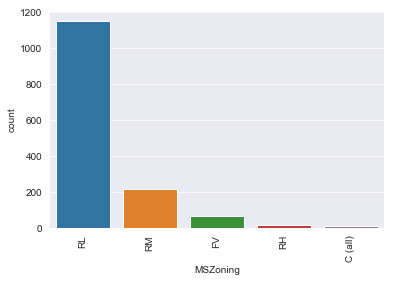

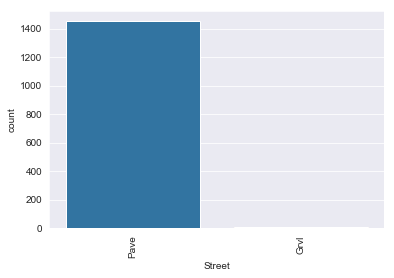

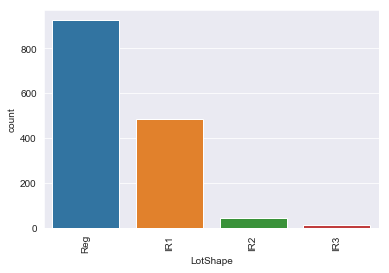

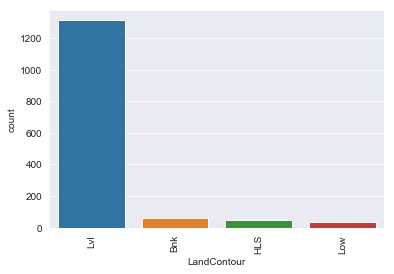

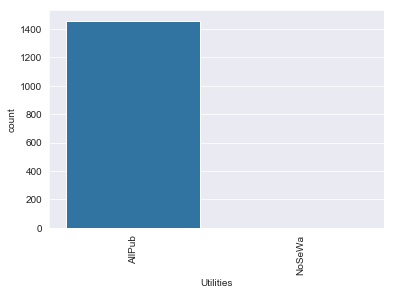

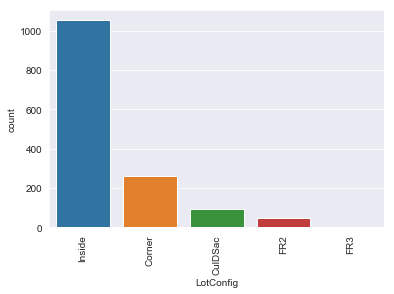

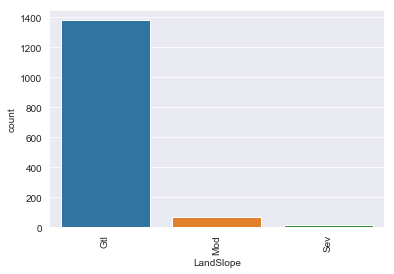

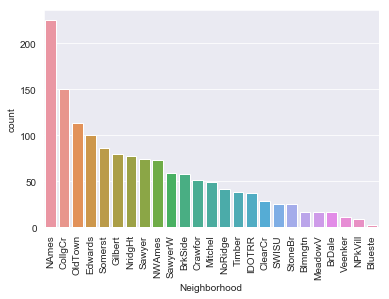

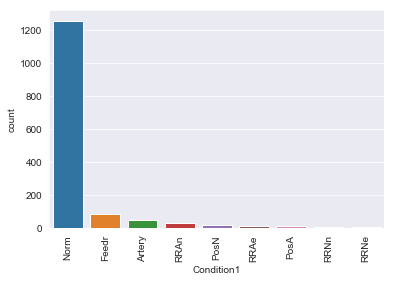

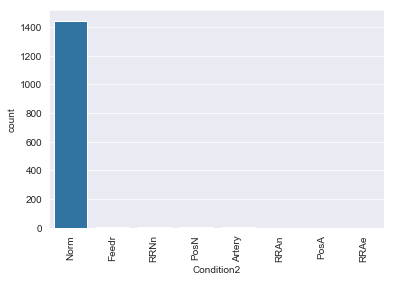

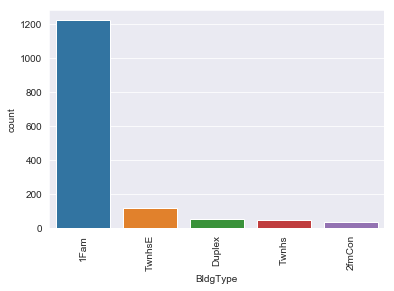

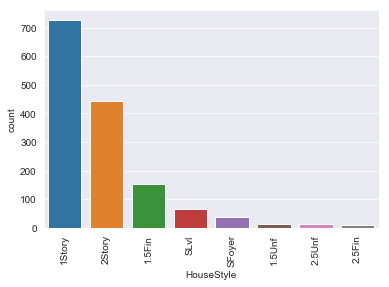

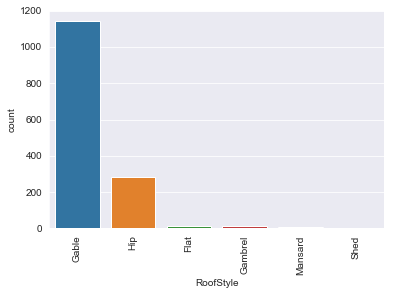

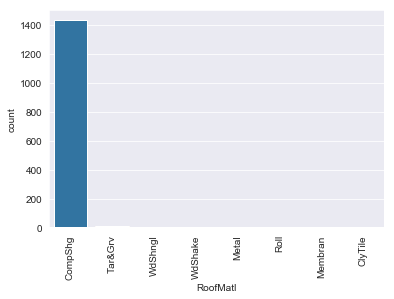

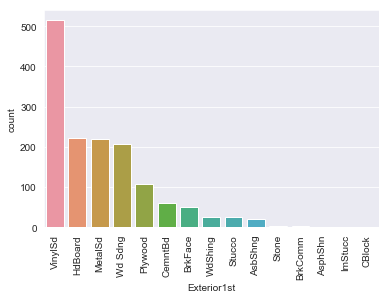

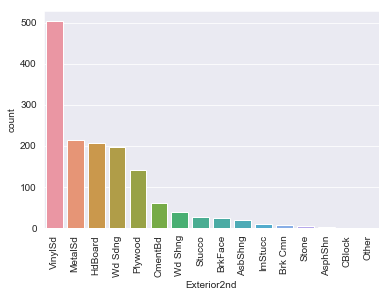

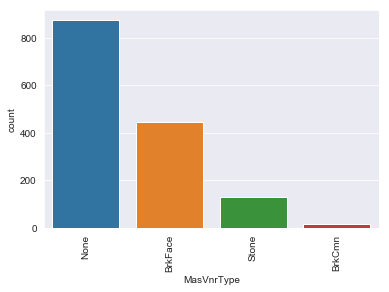

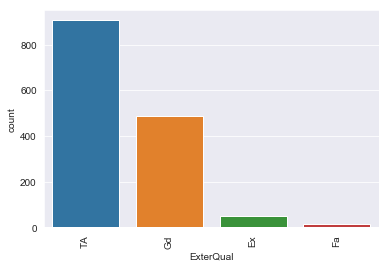

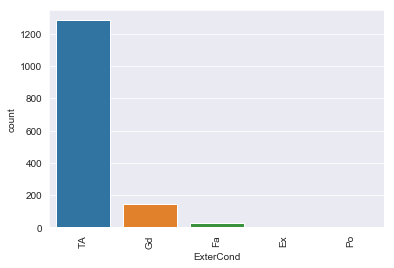

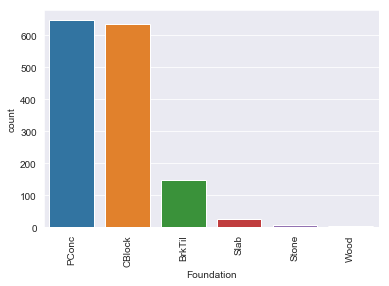

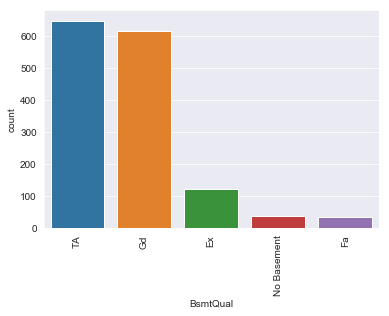

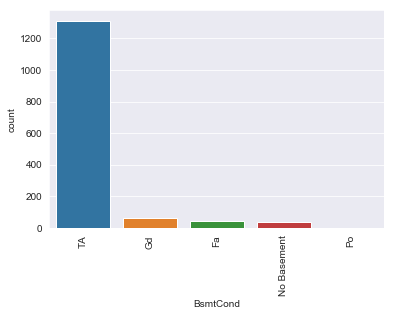

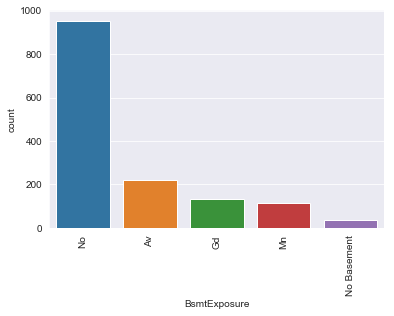

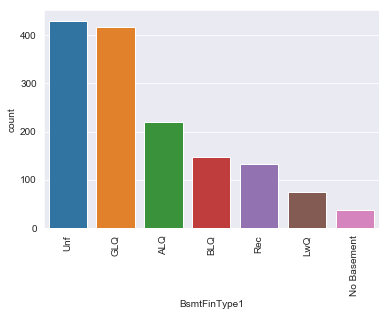

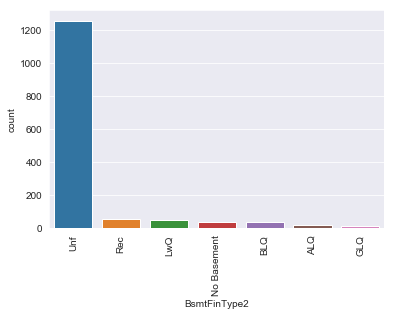

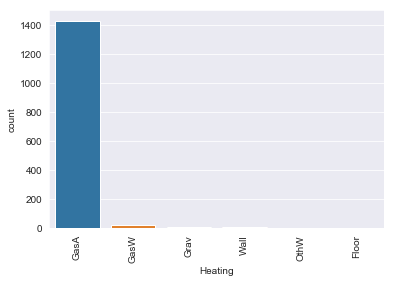

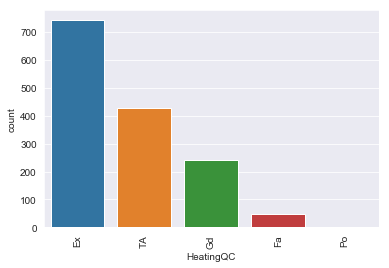

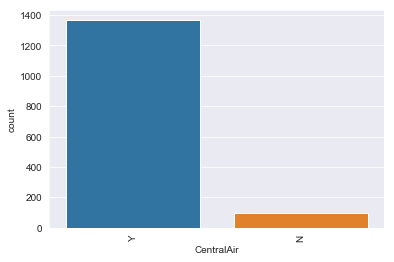

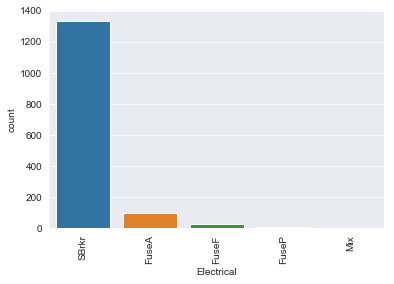

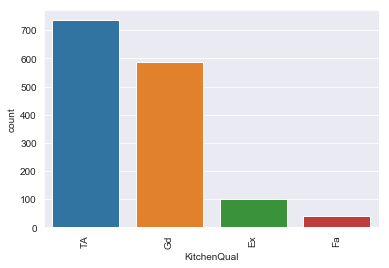

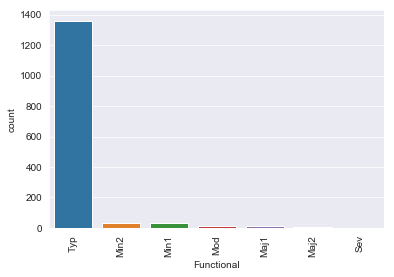

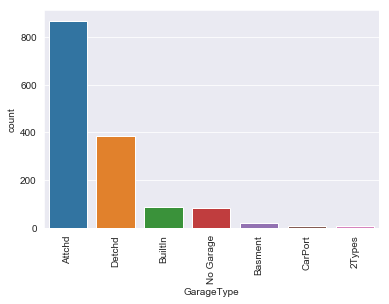

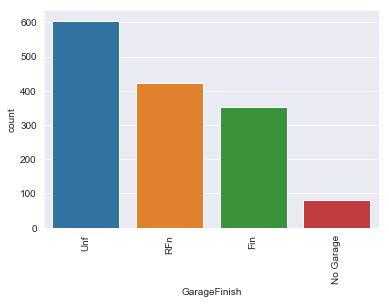

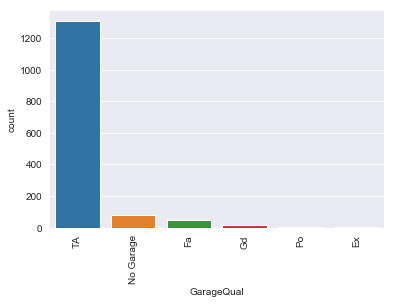

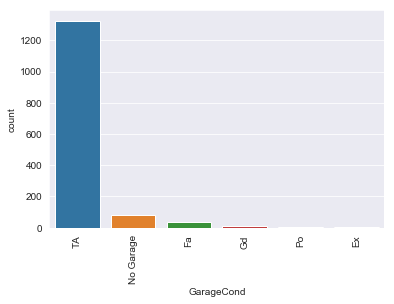

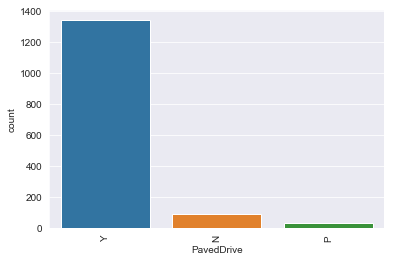

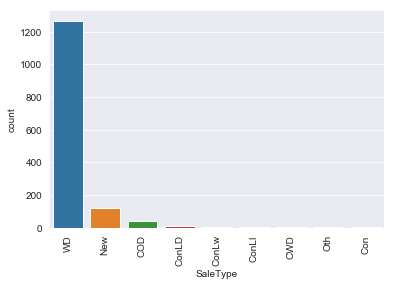

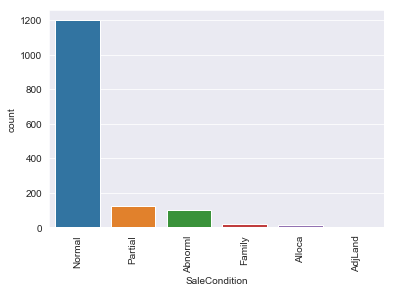

In [35]:
for i in categorical.columns:
    sns.countplot(categorical[i], order = categorical[i].value_counts().index)
    plt.xticks(rotation = 90)
    plt.show()

- Very High data imbalance in some columns.
- Dropping columns with a single category being present at least in 90% of rows.

In [36]:
100*train['MSZoning'].value_counts()/train.shape[0]

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [37]:
100*train['Street'].value_counts()/train.shape[0]

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [38]:
train.drop('Street', axis = 1, inplace = True)

In [39]:
100*train['LandContour'].value_counts()/train.shape[0]

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

In [40]:
train.drop('LandContour', axis = 1, inplace = True)

In [41]:
100*train['Utilities'].value_counts()/train.shape[0]

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

In [42]:
train.drop('Utilities', axis = 1, inplace = True)

In [43]:
100*train['LandSlope'].value_counts()/train.shape[0]

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

In [44]:
train.drop('LandSlope', axis = 1, inplace = True)

In [45]:
100*train['Condition2'].value_counts()/train.shape[0]

Norm      98.972603
Feedr      0.410959
RRNn       0.136986
PosN       0.136986
Artery     0.136986
RRAn       0.068493
PosA       0.068493
RRAe       0.068493
Name: Condition2, dtype: float64

In [46]:
train.drop('Condition2', axis = 1, inplace = True)

In [47]:
100*train['RoofMatl'].value_counts()/train.shape[0]

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Roll        0.068493
Membran     0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

In [48]:
train.drop('RoofMatl', axis = 1, inplace = True)

In [49]:
100*train['BsmtCond'].value_counts()/train.shape[0]

TA             89.794521
Gd              4.452055
Fa              3.082192
No Basement     2.534247
Po              0.136986
Name: BsmtCond, dtype: float64

In [50]:
train.drop('BsmtCond', axis = 1, inplace = True)

In [51]:
100*train['Heating'].value_counts()/train.shape[0]

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

In [52]:
train.drop('Heating', axis = 1, inplace = True)

In [53]:
100*train['CentralAir'].value_counts()/train.shape[0]

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

In [54]:
train.drop('CentralAir', axis = 1, inplace = True)

In [55]:
100*train['Electrical'].value_counts()/train.shape[0]

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [56]:
train.drop('Electrical', axis = 1, inplace = True)

In [57]:
100*train['Functional'].value_counts()/train.shape[0]

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

In [58]:
train.drop('Functional', axis = 1, inplace = True)

In [59]:
100*train['GarageQual'].value_counts()/train.shape[0]

TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Po            0.205479
Ex            0.205479
Name: GarageQual, dtype: float64

In [60]:
train.drop('GarageQual', axis = 1, inplace = True)

In [61]:
100*train['GarageCond'].value_counts()/train.shape[0]

TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64

In [62]:
train.drop('GarageCond', axis = 1, inplace = True)

In [63]:
100*train['PavedDrive'].value_counts()/train.shape[0]

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

In [64]:
train.drop('PavedDrive', axis = 1, inplace = True)

In [65]:
train.shape

(1460, 62)

- Visualization of Numerical Variables.

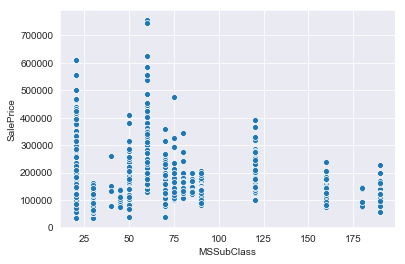

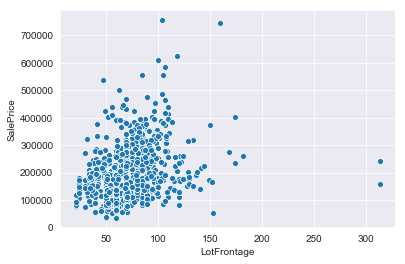

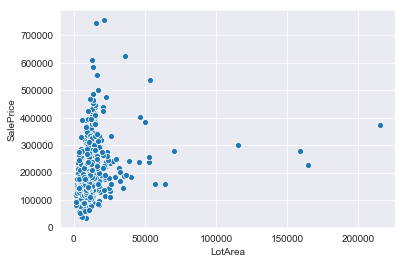

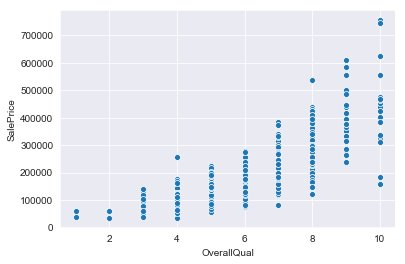

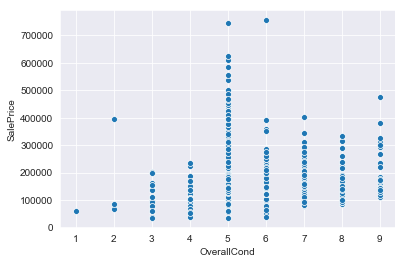

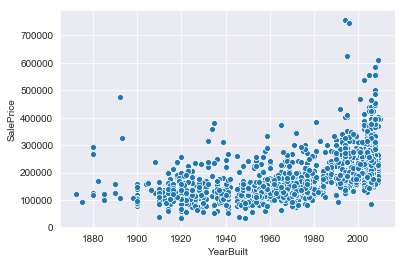

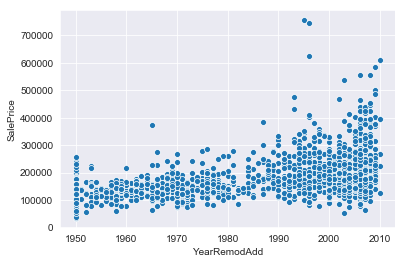

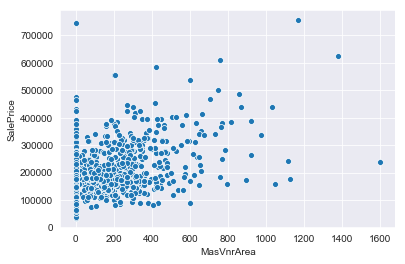

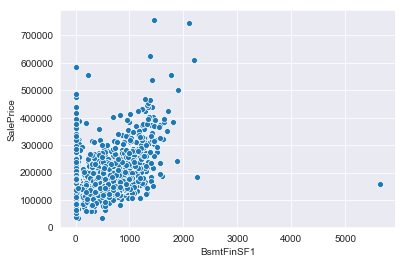

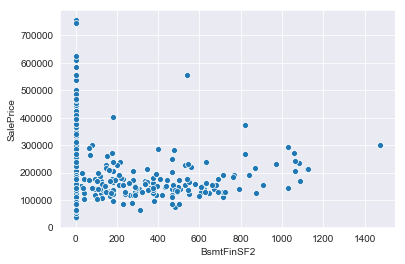

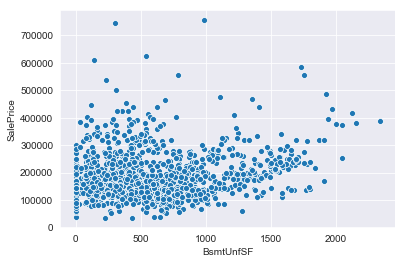

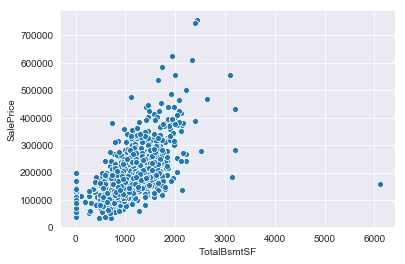

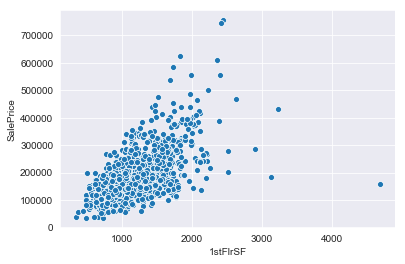

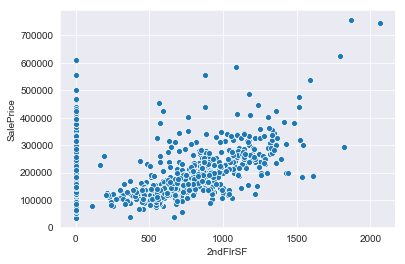

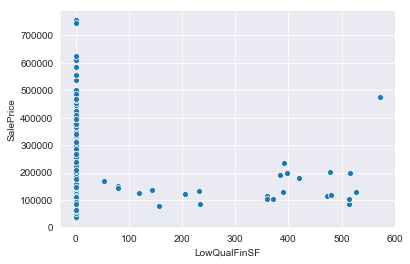

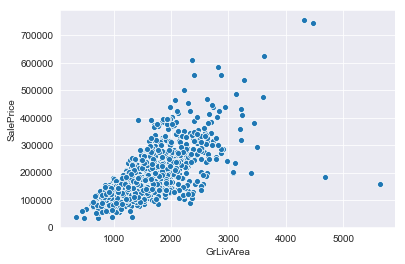

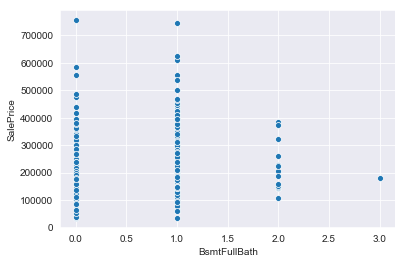

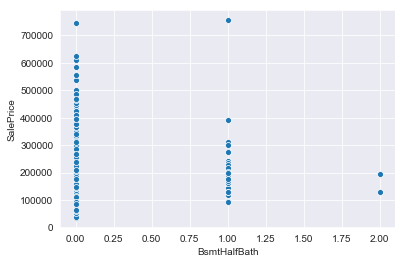

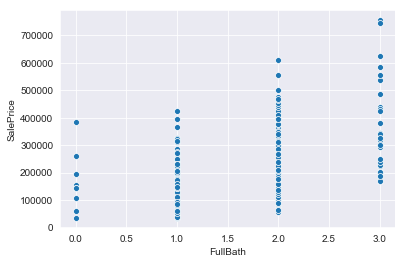

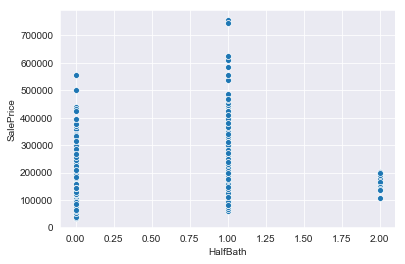

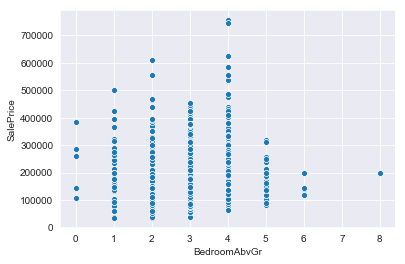

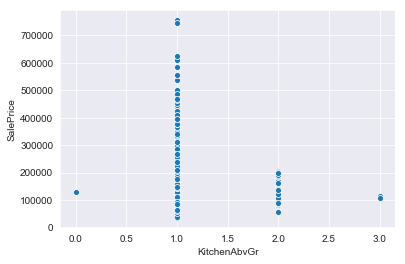

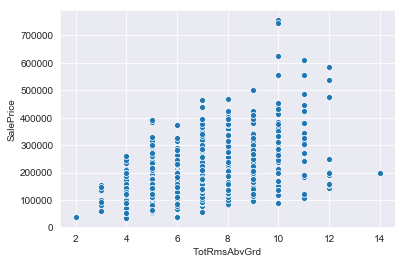

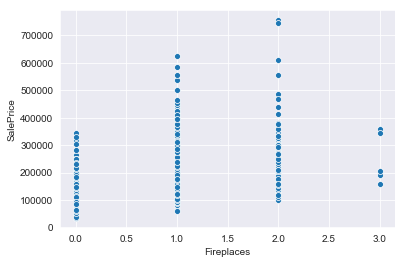

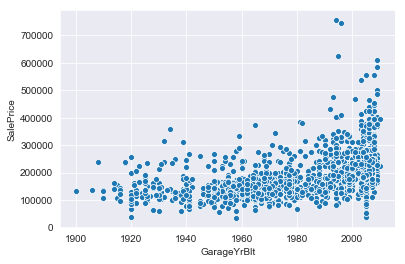

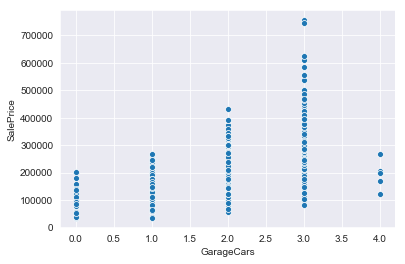

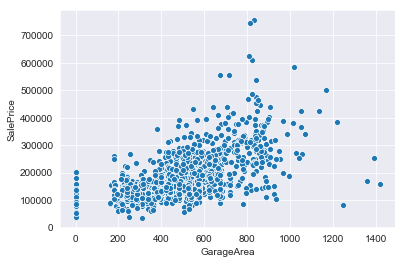

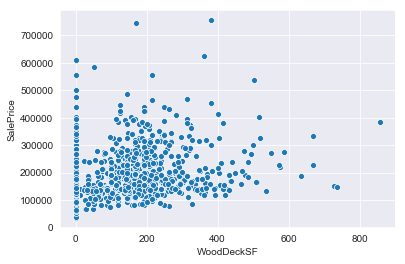

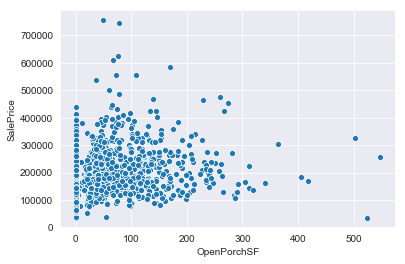

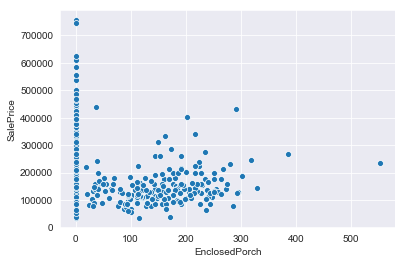

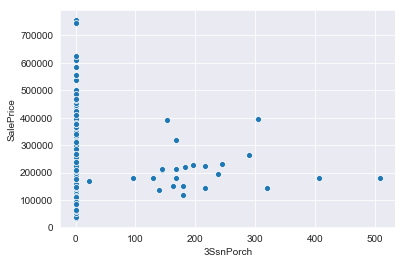

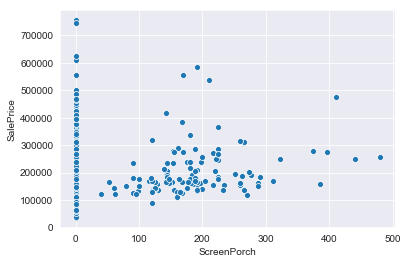

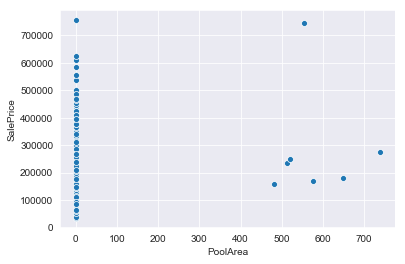

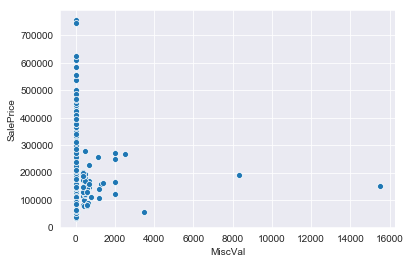

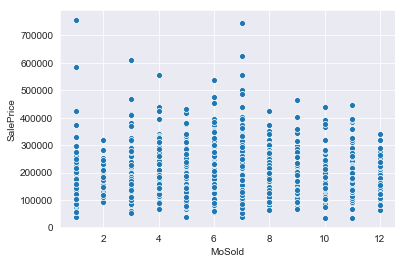

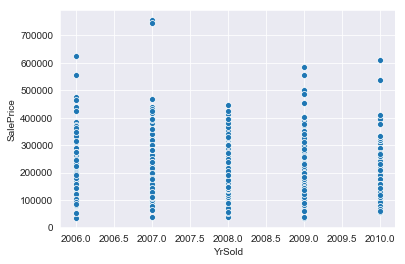

In [66]:
for i in numerical.columns[1:-1]:
    sns.scatterplot(numerical[i], numerical['SalePrice'])
    plt.show()

- Positive trend of some variables with **SalePrice** can be observed.

In [67]:
numerical.shape[1]

38

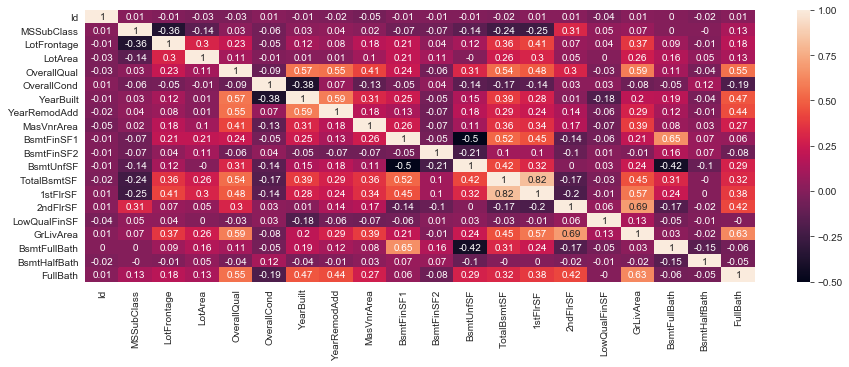

In [68]:
plt.figure(figsize = (15, 5))
sns.heatmap(round(numerical.iloc[:, :20].corr(), 2), annot = True)
plt.show()

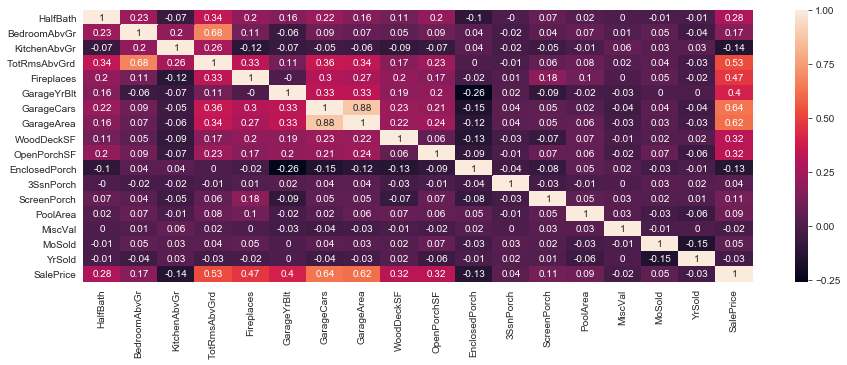

In [69]:
plt.figure(figsize = (15, 5))
sns.heatmap(round(numerical.iloc[:, 20:].corr(), 2), annot = True)
plt.show()

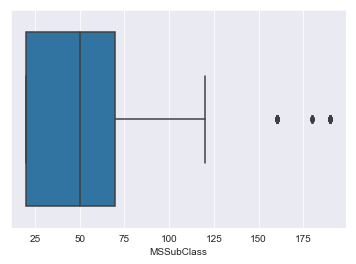

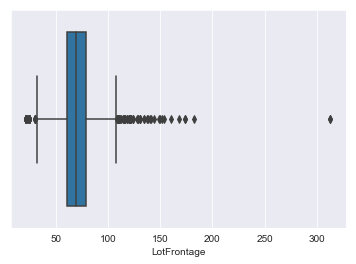

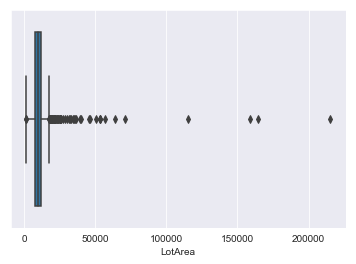

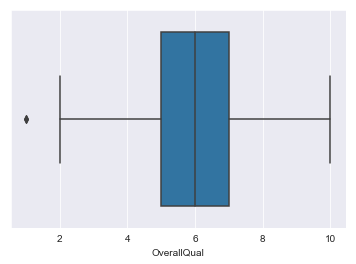

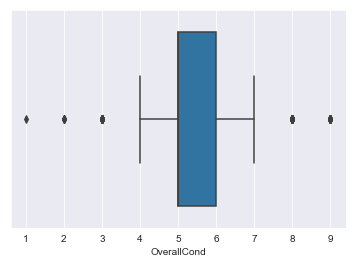

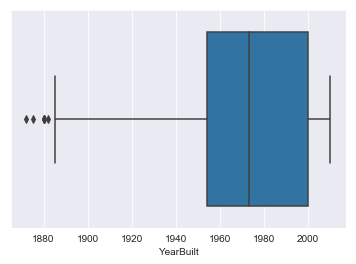

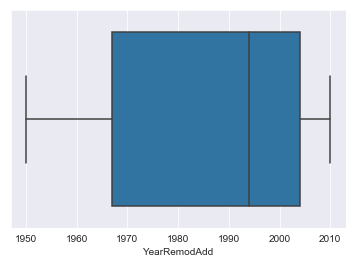

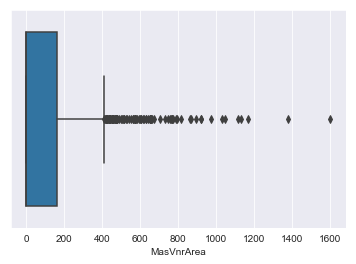

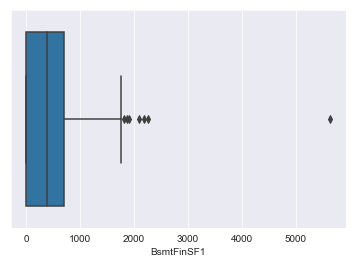

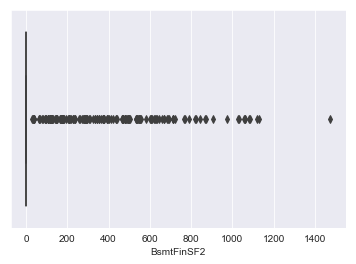

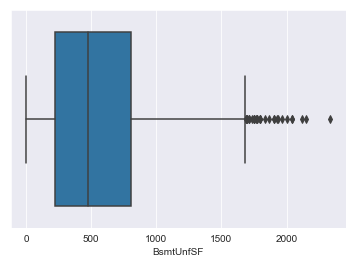

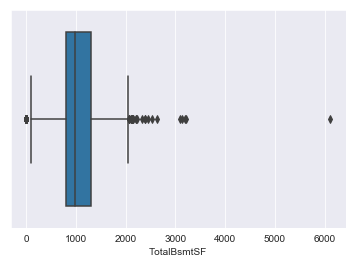

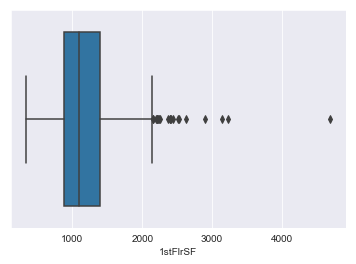

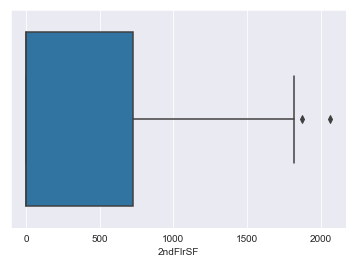

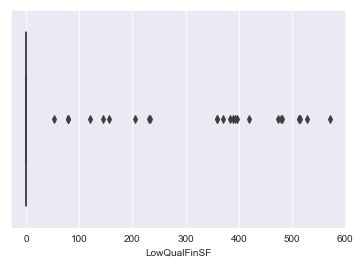

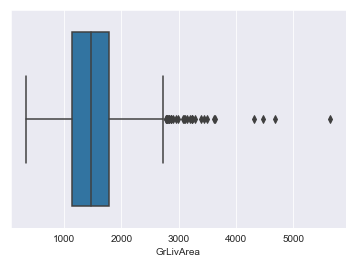

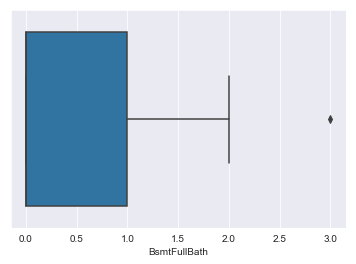

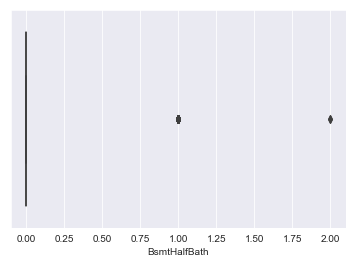

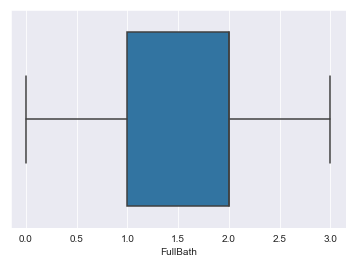

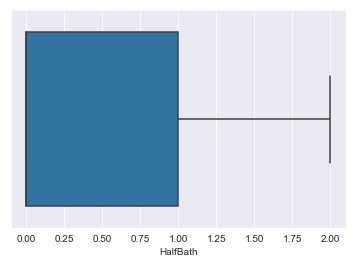

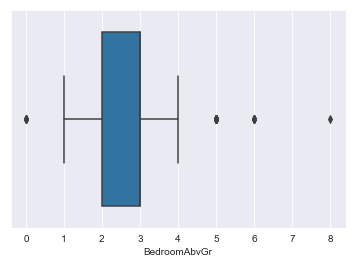

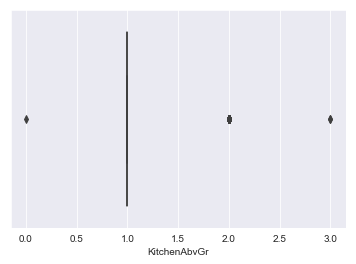

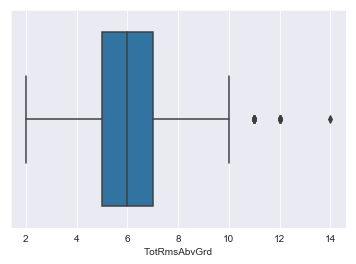

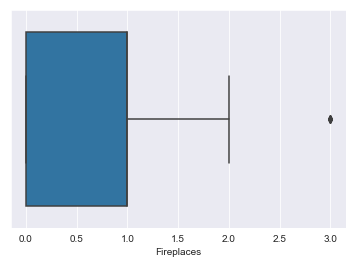

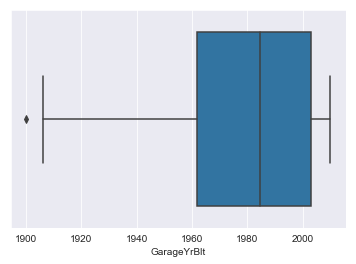

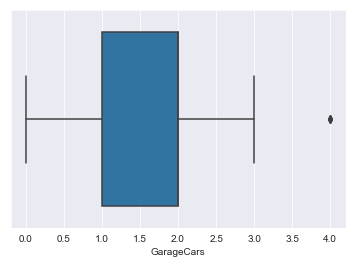

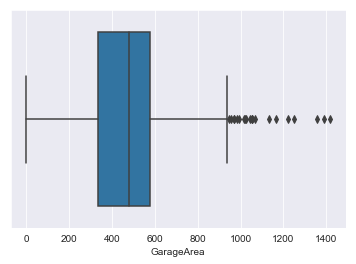

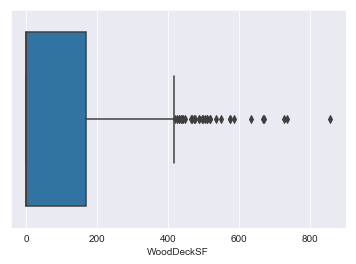

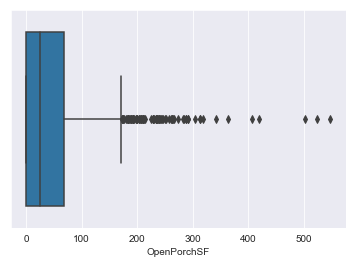

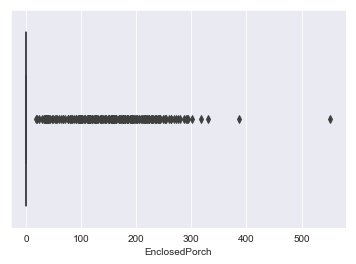

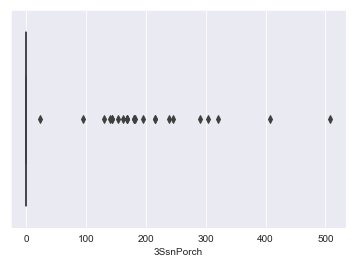

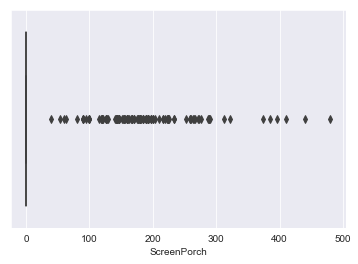

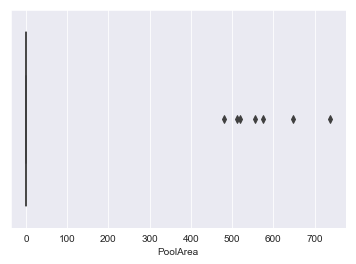

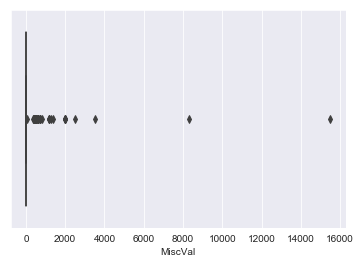

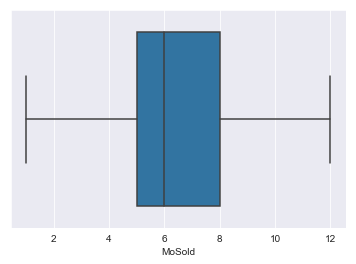

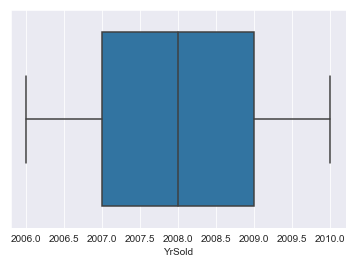

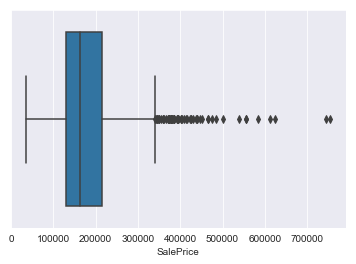

In [70]:
for i in numerical.columns[1:]:
    sns.boxplot(numerical[i])
    plt.show()

- Outliers are present.
- Due to limited data, let's perform limited outlier treatment.<br>
>- **LotArea**
>- **MasVnrArea**
>- **BsmtFinSF2**
- Retaining data with respect to 20th and 80th percentile.

In [71]:
# LotArea
q1 = train['LotArea'].quantile(0.20)
q3 = train['LotArea'].quantile(0.80)
iqr = q3 - q1
train = train[(train['LotArea'] >= q1 - 1.5*iqr) & (train['LotArea'] <= q3 + 1.5*iqr)]

In [72]:
# MasVnrArea
q1 = train['MasVnrArea'].quantile(0.20)
q3 = train['MasVnrArea'].quantile(0.80)
iqr = q3 - q1
train = train[(train['MasVnrArea'] >= q1 - 1.5*iqr) & (train['MasVnrArea'] <= q3 + 1.5*iqr)]

In [73]:
# BsmtFinSF2
q1 = train['BsmtFinSF2'].quantile(0.20)
q3 = train['BsmtFinSF2'].quantile(0.80)
iqr = q3 - q1
train = train[(train['BsmtFinSF2'] >= q1 - 1.5*iqr) & (train['BsmtFinSF2'] <= q3 + 1.5*iqr)]

In [74]:
train.shape

(1203, 62)

- Good percentage of data retained.

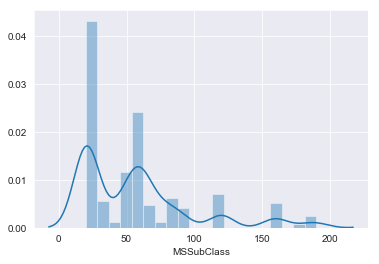

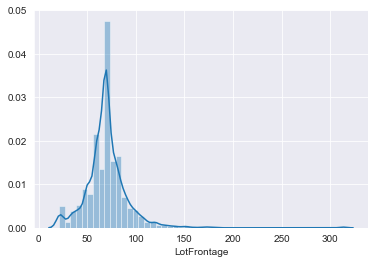

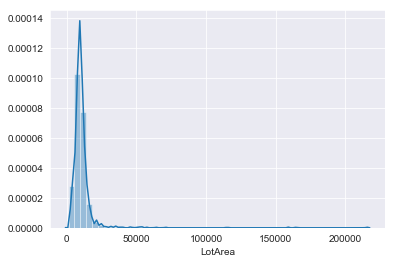

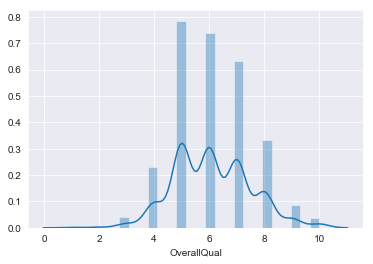

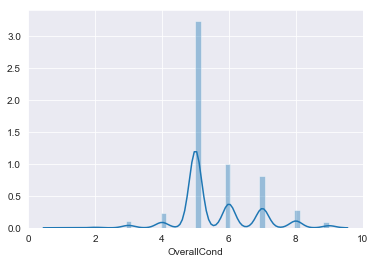

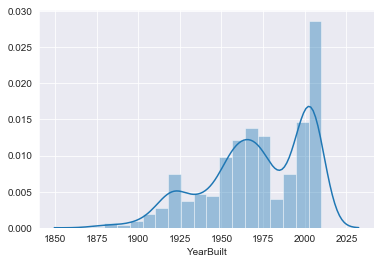

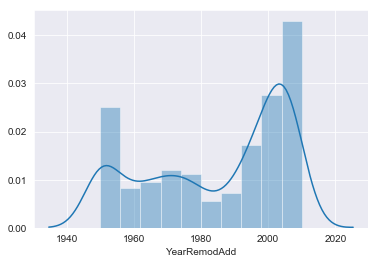

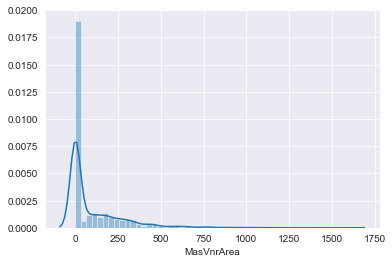

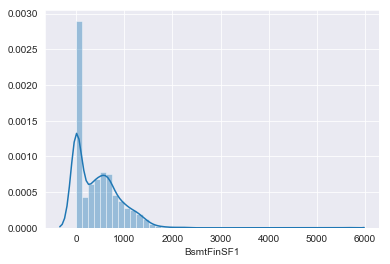

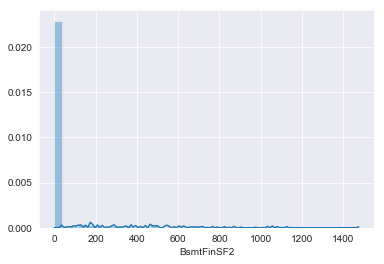

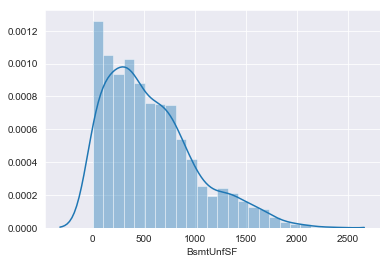

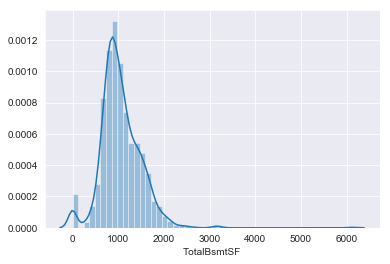

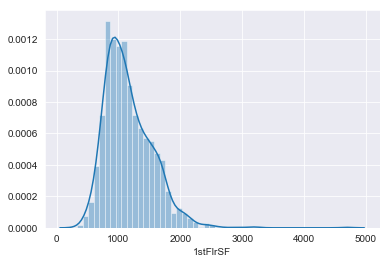

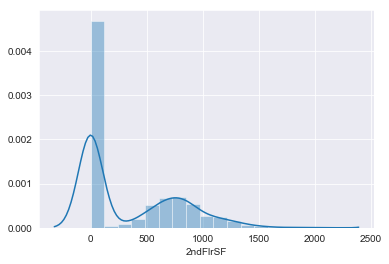

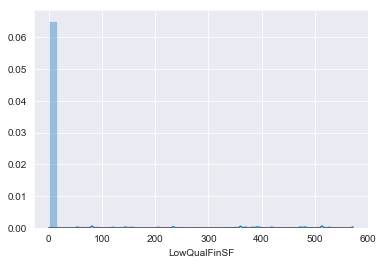

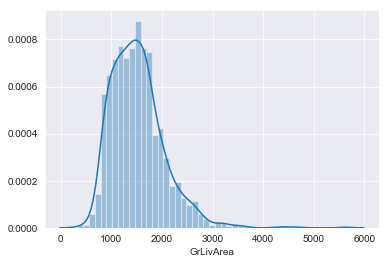

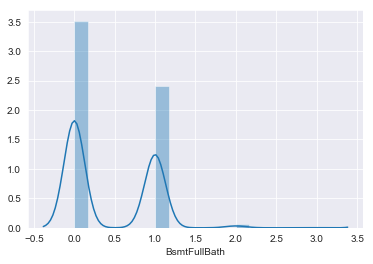

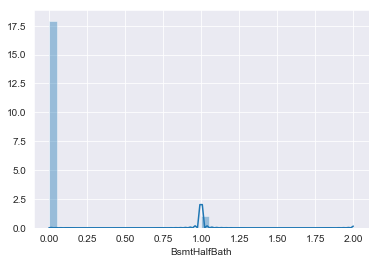

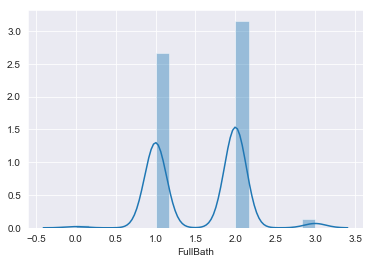

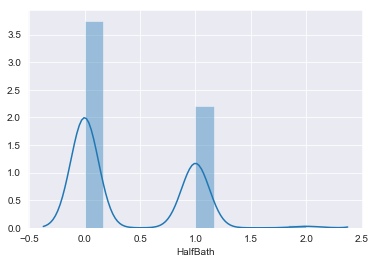

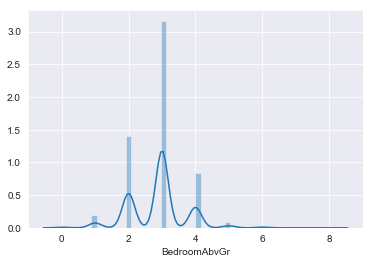

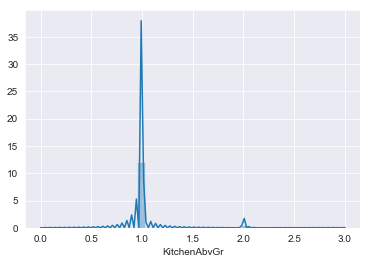

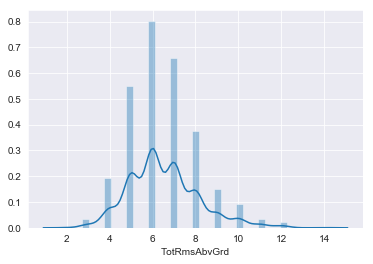

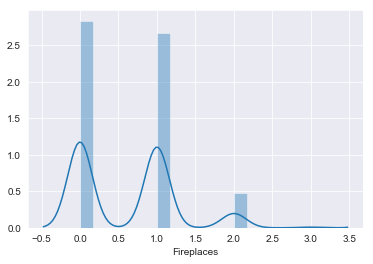

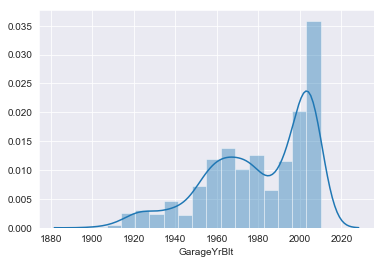

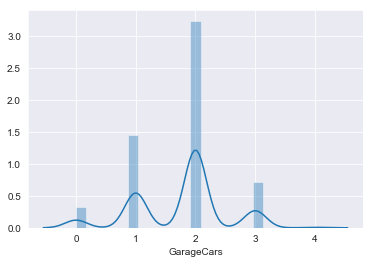

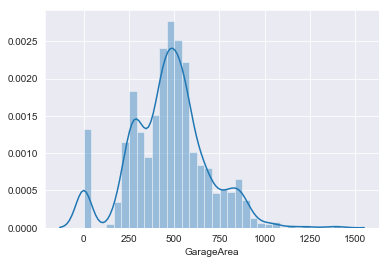

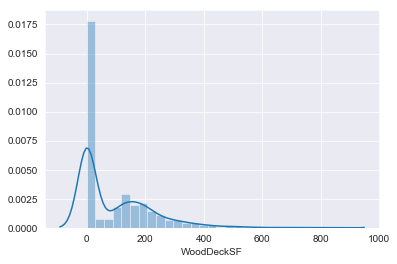

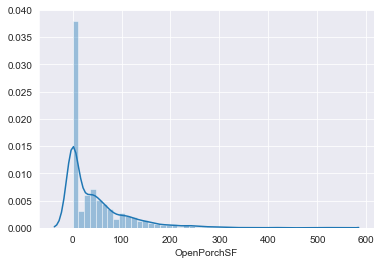

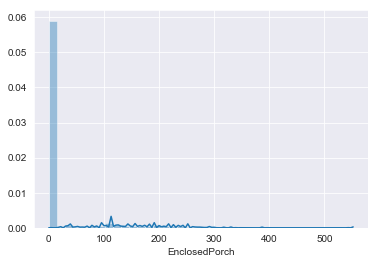

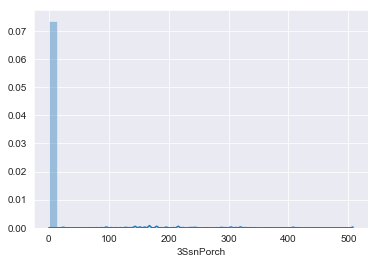

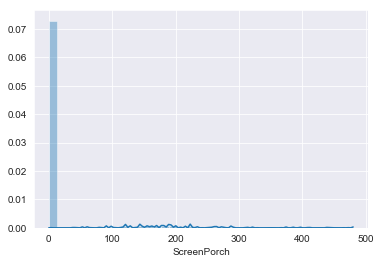

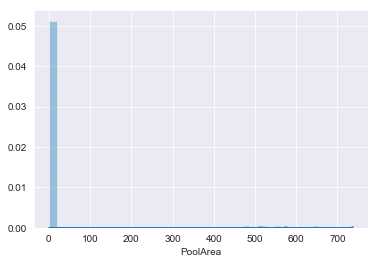

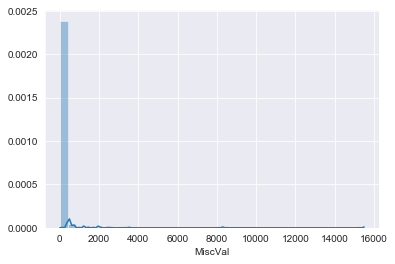

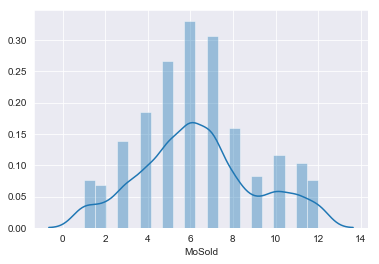

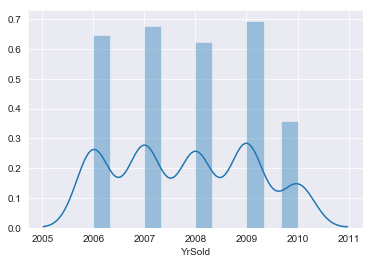

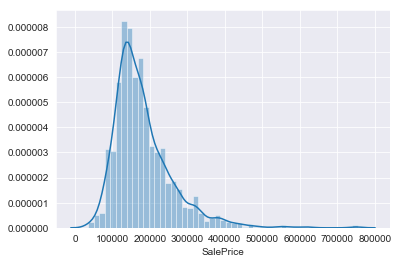

In [75]:
for i in numerical.columns[1:]:
    sns.distplot(numerical[i])
    plt.show()

- Skewness can be observed in some variables and also in SalePrice (target variable).
- Transformations are required.
- Columns pertaining to years (**YearBuilt, YearRemodAdd, GarageYrBlt, YrSold**) can be used to calculate age and the original columns can be dropped.

## Data Preparation.
- Calculation of Ages.
- Creating Dummies.
- Scaling.

In [76]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [77]:
# YearBuilt
train['YearBuilt_Age'] = train['YearBuilt'].max() - train['YearBuilt']
train.drop('YearBuilt', axis = 1, inplace = True)

In [78]:
# YearRemodAdd
train['YearRemodAdd_Age'] = train['YearRemodAdd'].max() - train['YearRemodAdd']
train.drop('YearRemodAdd', axis = 1, inplace = True)

In [79]:
# GarageYrBlt
train['GarageYrBlt_Age'] = train['GarageYrBlt'].max() - train['GarageYrBlt']
train.drop('GarageYrBlt', axis = 1, inplace = True)

In [80]:
# YrSold
train['YrSold_Age'] = train['YrSold'].max() - train['YrSold']
train.drop('YrSold', axis = 1, inplace = True)

In [81]:
train['Log_SalePrice'] = np.log(train['SalePrice'])

- Log transformation of the target variable **SalePrice** as it was skewed to the right.

In [82]:
X = train.drop(['Id', 'SalePrice', 'Log_SalePrice'], axis = 1)
y = train['Log_SalePrice']

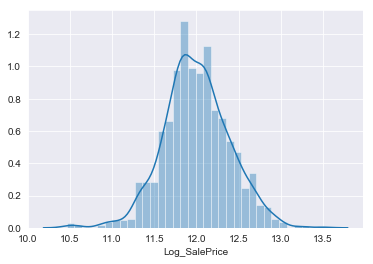

In [83]:
sns.distplot(y)
plt.show()

- Skewness removed.

In [84]:
categorical = X.select_dtypes(include = 'object')
categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal


In [85]:
dummies = pd.get_dummies(categorical, drop_first = True)

In [86]:
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


- Dummy variables created.

In [87]:
X.drop(list(categorical.columns), axis = 1, inplace = True)

In [88]:
X = pd.concat([dummies, X], axis = 1)

In [89]:
from sklearn.preprocessing import scale
columns = X.columns
X = pd.DataFrame(scale(X))
X.columns = columns

In [90]:
X.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,-0.229114,-0.112367,0.555906,-0.445205,-0.133291,-0.064604,0.724372,-0.235081,-0.18784,-0.057759,0.613539,-0.028843,-0.108511,-0.218882,-0.096063,2.744433,-0.190199,-0.280934,-0.256017,-0.170542,-0.100377,-0.180605,-0.393078,-0.08182,-0.208243,-0.142675,-0.235081,-0.309238,-0.142675,-0.225067,-0.210406,-0.266904,-0.126678,-0.148627,-0.076504,-0.237044,0.386001,-0.057759,-0.108511,-0.091555,-0.126678,-0.040808,-0.057759,-0.151523,-0.19713,-0.185456,-0.292814,-0.108511,-0.979430,-0.076504,-0.096063,1.491711,-0.159923,-0.206061,0.488804,-0.091555,-0.463844,-0.064604,-0.028843,-0.040808,-0.183044,-0.212551,-0.404281,-0.028843,-0.433084,-0.248562,-0.126678,1.273152,-0.393078,-0.136485,-0.040808,-0.070799,-0.133291,-0.212551,-0.386001,-0.08182,-0.424934,-0.028843,-0.292814,-0.05,-0.126678,1.291281,-0.383153,-0.167944,1.561135,-1.248829,-0.320403,-0.100377,1.348084,-1.244479,-0.148627,-0.318823,-0.028843,0.364374,-0.799353,1.059100,-0.139612,-0.070799,-0.05,-0.170542,1.132578,-0.175637,-0.859325,-0.270461,-0.279208,0.693922,-0.178136,-0.312454,1.561135,-0.19713,-0.175637

- Variables scaled.

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

## Building the Model
- Ridge Regression
- Lasso Regression

##### <u>Ridge Regression</u>

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 
                    100, 200]}

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0048,0.000400,0.0010,1.168008e-07,0.001,{'alpha': 0.001},0.923784,0.901631,0.896790,0.915624,0.886619,0.904906,0.013284,22,0.944422,0.947734,0.950031,0.947371,0.953641,0.948639,0.003071
1,0.0048,0.000748,0.0010,1.168008e-07,0.01,{'alpha': 0.01},0.923845,0.901649,0.896795,0.915653,0.886651,0.904935,0.013296,21,0.944422,0.947734,0.950031,0.947370,0.953641,0.948639,0.003071
2,0.0042,0.000400,0.0012,3.999233e-04,0.05,{'alpha': 0.05},0.924100,0.901732,0.896817,0.915769,0.886791,0.905058,0.013342,20,0.944421,0.947733,0.950030,0.947370,0.953640,0.948639,0.003071
3,0.0056,0.000490,0.0010,1.907349e-07,0.1,{'alpha': 0.1},0.924386,0.901836,0.896843,0.915894,0.886955,0.905199,0.013391,19,0.944419,0.947733,0.950030,0.947368,0.953638,0.948638,0.003072
4,0.0054,0.000800,0.0012,3.999472e-04,0.2,{'alpha': 0.2},0.924868,0.902046,0.896893,0.916093,0.887251,0.905447,0.013465,18,0.944414,0.947729,0.950027,0.947360,0.953633,0.948633,0.003072


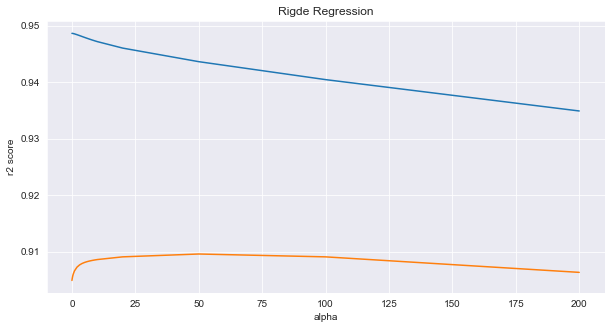

In [94]:
plt.figure(figsize = (10, 5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('Rigde Regression')
plt.show()

- alpha = 50 appears to be optimal.

In [95]:
model_cv.best_params_

{'alpha': 50}

In [96]:
alpha = 50
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9413075642818322
0.8926604869047199


- High value both R2 in both Train and Test set is observed.

In [98]:
ridge_coeff = pd.DataFrame(list(zip(X_train.columns, ridge.coef_)), columns = ['Features', 'Coeff'])
ridge_coeff = ridge_coeff.sort_values(by = 'Coeff', ascending = False)
ridge_coeff

,Features,Coeff
146,OverallQual,6.413765e-02
156,GrLivArea,5.621927e-02
147,OverallCond,5.085362e-02
153,1stFlrSF,3.750248e-02
152,TotalBsmtSF,3.454195e-02
2,MSZoning_RL,3.285085e-02
154,2ndFlrSF,3.133674e-02
141,SaleCondition_Normal,2.755948e-02
145,LotArea,2.706441e-02
95,Foundation_PConc,2.689787e-02


- Order of precedence of variables as per Ridge.

In [99]:
np.exp(y_test_pred)

array([198450.68217023, 149488.2887439 , 163400.51793655, 288991.58327576,
       165973.86973243, 140083.76665116, 186276.56807759, 140966.53825412,
       207650.57631393, 132437.52860715, 159571.22851047, 137251.93101727,
       338029.90502872, 117960.10950238, 142800.05086917,  79648.80862024,
       162326.08719458, 109726.28547629, 121855.4866328 , 126652.95102566,
       315307.55238239, 166332.82359593, 155164.71735751, 105953.4643009 ,
       145502.02057487, 173891.02651409, 232287.22092306, 141073.73508854,
       168800.37265645, 335194.57664739, 116687.22267335, 220066.76956249,
       226256.16361614, 226717.06049237, 180774.33708917, 230141.10273447,
       105040.42169174, 117308.42249689, 158478.76179786, 295271.03688439,
       367338.81487411, 149515.94947628, 126946.90039243, 102159.04536503,
       200181.69427301, 108395.60479854,  98968.56423757, 225945.53799743,
       122584.94129314, 223927.62657909, 243097.59959064,  94555.46553893,
       161915.90240795, 1

- Predicted values after anti-log transformation performed.

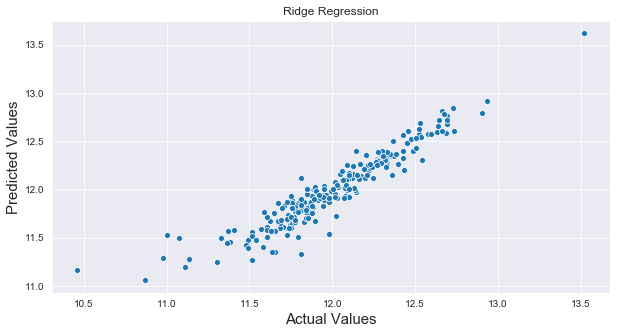

In [100]:
plt.figure(figsize = (10,5))
sns.scatterplot(y_test, y_test_pred)
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)
plt.title('Ridge Regression')
plt.show()

##### <u>Lasso Regression</u>

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

lasso = Lasso()
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

params = {'alpha': [0.0001, 0.0002, 0.0005, 0.0009, 0.001, 0.009, 0.01, 0.02, 0.03, 0.04]}

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = n_folds, 
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.0009, 0.001, 0.009, 0.01, 0.02, 0.03, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)

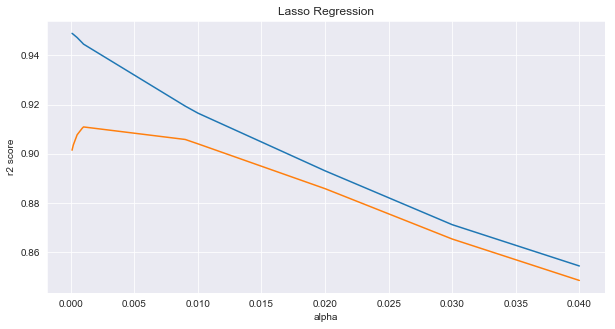

In [103]:
plt.figure(figsize = (10, 5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('Lasso Regression')

plt.show()

In [104]:
model_cv.best_params_

{'alpha': 0.001}

- alpha lose to zero appears to be optimal.
- It signifies that Lasso Regression on the data set is as good as Normal Regression without regularization.
- Let's consider alpha = 0.001

In [105]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9410462635685456
0.8951055454511118


- High value of R2 achived on both train and test sets.

In [107]:
lasso_coeff = pd.DataFrame(list(zip(X_train.columns, lasso.coef_)), columns = ['Features', 'Coeff'])
lasso_coeff = lasso_coeff.sort_values(by = 'Coeff', ascending = False)
lasso_coeff

,Features,Coeff
156,GrLivArea,0.118398
146,OverallQual,0.073086
147,OverallCond,0.057521
2,MSZoning_RL,0.051370
152,TotalBsmtSF,0.039880
145,LotArea,0.029002
0,MSZoning_FV,0.028387
3,MSZoning_RM,0.028093
141,SaleCondition_Normal,0.026818
149,BsmtFinSF1,0.025732


- Order of precedence of variables as per Lasso.
- Coefficients of many variables can be seen as zero, hence **Feature Selection** performed.

In [108]:
np.exp(y_test_pred)

array([200075.03502587, 149127.70722656, 157963.8042877 , 288219.59785615,
       164477.72029843, 138563.1733982 , 185311.51939634, 139035.88338981,
       205254.88891168, 131841.44826945, 162253.65971832, 134955.41349134,
       329483.11437757, 116272.7053017 , 142173.71476714,  79216.25847633,
       163088.63366741, 110886.70605819, 119171.44102988, 122496.03894505,
       312028.1926285 , 167020.13541568, 156807.97049965, 105369.24168139,
       148333.39104784, 173900.77569287, 228889.04560007, 139628.36452145,
       169760.49465281, 332731.32131463, 116871.00903108, 218532.2728455 ,
       225553.65274518, 225255.3763538 , 181467.83867823, 232125.21538678,
       104132.36552792, 116501.22104262, 161929.18686826, 301045.82525749,
       375892.22300777, 147914.24525739, 122273.2187667 , 107493.28105426,
       199946.93884105, 109416.02912438,  99032.70738911, 227371.52891059,
       119253.46591928, 226443.81049953, 247791.53222025,  94157.64853431,
       164018.45302441, 1

- Predicted values after anti-log transformation performed.

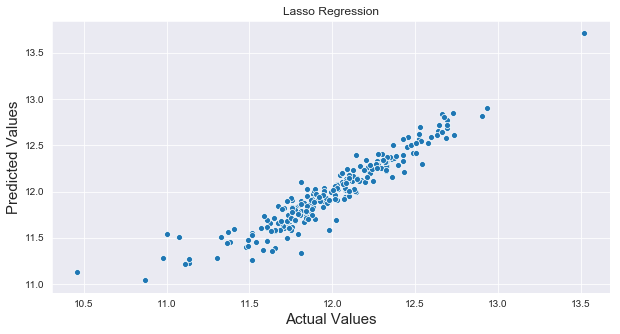

In [109]:
plt.figure(figsize = (10,5))
sns.scatterplot(y_test, y_test_pred)
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)
plt.title('Lasso Regression')
plt.show()

## Conclusion
- Both forms of Regression are giving great results.
- Lasso Regression is as good as Normal Regression with having the Regularization parameter almost equal to zero.